# Gesundheitswesen

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()
 
df = pd.read_csv('data/23131-0005_de_san.csv', sep=';')
foo = df[['geschlecht', 'jahr', 'Deutschland', 'Baden-Württemberg', 'Bayern']]


foo.head()


,geschlecht,jahr,Deutschland,Baden-Württemberg,Bayern
0,männlich,2014,9241703,1029064,1403870
1,männlich,2015,9344535,1041363,1418202
2,männlich,2016,9496908,1057850,1440257
3,männlich,2017,9465908,1060154,1434148
4,männlich,2018,9427596,1055209,1440826


In [33]:
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc
from dd import DataDictionary as dd

df_s = pd.read_csv('data/23111-0001_de_san.csv', sep=';')
cols = ['geschlecht', 'jahr', 'Deutschland', 'Baden-Württemberg', 'Bayern']
 
app = Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])
# App layout'
fig  = px.line(df_s, x='jahr', y='anz_kh')
 
app.layout = [
    html.H1(children='Grunddaten der Krankenhäuser', className="m-5"),
    #html.Hr(),
    
    dash_table.DataTable(data=df_s.to_dict('records'), columns=[{"name": i, "id": i} for i in df_s.columns], page_size=5),
    #dcc.Checklist(options=opt, id='controls-and-check-item', value=['pkv', 'gkv']),
    dcc.Graph(figure=fig, id='controls-and-graph')
]
#fig, ax = plt.subplots()

#exit()
# Add controls to build the interaction
@callback(
    Output(component_id='controls-and-graph', component_property='figure'),
    Input(component_id='controls-and-check-item', component_property='value')
)
def update_graph(col_chosen):
    print(col_chosen)
    foo = df[col_chosen]
    fig = px.line(foo, x='jahr',  y='anz_kh')
    return fig

if __name__ == '__main__':
    app.run(debug=False, port=4711)

In [41]:
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc
from dd import DataDictionary as dd

df_s = pd.read_csv("data/23111-0001_de_san.csv", sep=";")
cols = [
    "jahr",
    "anz_kh",
    "bett",
    "bett_100k",
    "pat",
    "pat_100k",
    "ber_bch",
    "verweil_dschn",
    "bett_aus_dschn",
]

sel_cols = [
    "anz_kh",
    "bett_100k",
    "pat_100k"
]
for col in sel_cols:
    print(col)
    px.line(df_s, x='jahr', y=col);

#df_s.keys()

anz_kh
bett_100k
pat_100k


         jahr    insg   hau_a  na_p,na_p_pfleg
1991  1119791  109072  913376         389511.0
1992  1133050  111115  926181         399915.0
1993  1134690  111608  928858         405848.0
1994  1146779  114208  936904         417272.0
1995  1161863  116346  948013         429183.0


<Axes: xlabel='jahr', ylabel='hau_a'>

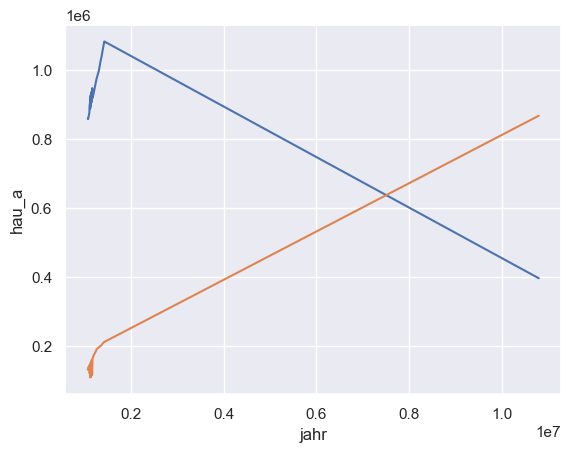

In [ ]:
df = pd.read_csv('data/23111-0002_de_san.csv', sep=";")
print(df.head())
sns.lineplot(data=df, x='jahr', y='hau_a')
sns.lineplot(data=df, x='jahr', y='insg')